สิรวิชญ์ ถวิลไทย 6030826721

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

นำเข้าข้อมูลด้วย pandas

In [2]:
accident = pd.read_csv("https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv")

In [3]:
accident

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [4]:
accident.dtypes

title         object
latitude     float64
longitude    float64
dtype: object

plot ข้อมูลออกมาเพื่อดูลักษณะการกระจายตัว

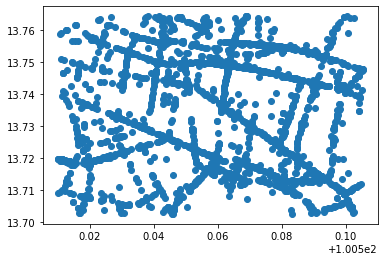

In [55]:
plt.scatter(accident['longitude'], accident['latitude'], cmap='viridis')
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering as Agg

สร้าง array เพื่อแยก string ของ title ออกจาก datasets ให้ทำการ fits กับ model ที่สร้างได้

In [7]:
acc_point = np.array(accident[['latitude','longitude']].values.tolist())
acc_point

array([[ 13.75698822, 100.56525484],
       [ 13.71764933, 100.56523204],
       [ 13.72836112, 100.51587805],
       ...,
       [ 13.7536295 , 100.5802926 ],
       [ 13.70441981, 100.51629111],
       [ 13.74915145, 100.51672965]])

สร้างโมเดลแบบ Hierarchical โดยกำหนด clusters ขึ้นมาทั้งหมด 7 clusters

In [87]:
model = Agg(n_clusters=7 ).fit(acc_point)

label แยกว่าแต่ละ index อยู่ใน cluster ใด

In [88]:
agg_label=model.labels_

In [89]:
agg_label

array([5, 6, 3, ..., 0, 3, 1])

plot เพื่อดูลักษณะของแผนที่หลังถูก cluster แล้ว

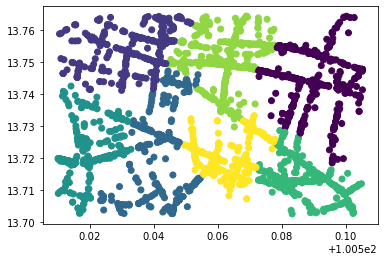

In [91]:
plt.scatter(accident['longitude'], accident['latitude'], c=agg_label)
plt.show()

ใช้ silhouette score เพื่อดูว่าการแบ่งกลุ่มนั้นครอบคลุมมากน้อยแค่ไหน

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [93]:
silhouette_score(acc_point, agg_label)

0.3897317936662634

นำเข้า model เพื่อทำการ visualize ข้อมูลจุดที่มีแนวโน้มการเกิดอุบัติเหตุบ่อย โดยใช้ agg_label หรือ label ของ model ที่ assign ไว้ให้ในแต่ละ index เป็นตัวกำหนดว่าเป็น cluster ใดๆ(1-6)ทำการแยกเป็นสีให้ชัดเจน ไม่นับ cluster ที่ 0 เนื่องจากเป็น outlier ไม่ถูกจัดกลุ่ม

In [122]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(accident.latitude)
longitudes = list(accident.longitude)
labels = list(accident.title)
clusters = list(agg_label)

for lat, lng, label, cIndex in zip(latitudes, longitudes, labels, clusters):
  colors = ''
  if cIndex == 1:
    colors = 'Red'
  elif cIndex == 2:
    colors = 'blue'
  elif cIndex == 3:
    colors = 'green'
  elif cIndex == 4:
    colors = 'cyan'
  elif cIndex == 5:
    colors = 'magenta'
  elif cIndex == 6:
    colors = 'yellow'
  fo.Circle(
    location = [lat, lng],
    radius = 1,
    color = colors   
    ).add_to(station_map)
station_map